In [6]:
library(dbConnect)
library(splitstackshape)
library(RMySQL)
library(igraph)

Loading required package: RMySQL
Loading required package: DBI
Loading required package: gWidgets
Loading required package: data.table

Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [7]:
con<-dbConnect(MySQL(),user="GenBankUser", password="123GenBank456",host="metadatalab.syr.edu", dbname="genbank")


In [8]:
start.time <- Sys.time()
ref<-dbGetQuery(con,"SELECT r.id, r.authors, r.title, r.journal, r.year, COUNT(*) 
                    FROM genbank.Reference as r GROUP BY r.journal
                    LIMIT 100000;")
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken
#Be careful not to run this repeatedly. 

Time difference of 43.33048 secs

In [9]:
dim(ref)
ref[1:3, ] #check the first 3 rows 

[1] 100000      6

id,authors,title,journal,year,COUNT(*)
178765012,NA,,,NA,10113
3126613001,"Fristensky,B., Balcerzak,M., He,D.-F. and Zhang,P.",Expressed sequence tags from the defense response of Brassica napus to Leptosphaeria maculans,"(er) Mol. Plant Pathol. none, 0301FRISTENSKY (1999)",1999,2
15149220003,"McCarthy,J., Lima,A.O.S., Yernool,D. and Eveleigh,D.E.",Directed evolution of three hyperthermophilic glycosyl hydrolases using green fluorescent protein-tagging to facilitate elimination of null mutants in the primary screen,(in) 100TH GENERAL MEETING OF THE AMERICAN MICROBIOLOGY SOCIETY: 81; (2000),2000,1


In [10]:
ref=ref[-1,] #get rid of the NULLS
ref[1:4,]


,id,authors,title,journal,year,COUNT(*)
2,3126613001,"Fristensky,B., Balcerzak,M., He,D.-F. and Zhang,P.",Expressed sequence tags from the defense response of Brassica napus to Leptosphaeria maculans,"(er) Mol. Plant Pathol. none, 0301FRISTENSKY (1999)",1999,2
3,15149220003,"McCarthy,J., Lima,A.O.S., Yernool,D. and Eveleigh,D.E.",Directed evolution of three hyperthermophilic glycosyl hydrolases using green fluorescent protein-tagging to facilitate elimination of null mutants in the primary screen,(in) 100TH GENERAL MEETING OF THE AMERICAN MICROBIOLOGY SOCIETY: 81; (2000),2000,1
4,77994166001,"Yu,L.C., He,L.M. and Han,J.C.",A catalog of Pyemotids (Acari:Pyemotidae) parasitic on bark beetles (Coleoptera:Scolytidae) from China,(in) 10TH INTERNATIONAL CONGRESS OF ACAROLOGY; (1998),1998,1
5,430728250001,"Hong,M.-H. and Kim,K.-J.",Complete chloroplast genome sequences of common tea (Camellia sinensis (L.) O. Kuntze var. sinensis),(in) 10TH INTERNATIONAL CONGRESS ON PLANT MOLECULAR BIOLOGY; (2012),2012,1


In [11]:
colnames(ref)[6]<-"count"
colnames(ref)
t<-table(ref$count)
t<-data.frame(t)
colnames(t)
t[1:20,]
summary(t)

[1] "id"      "authors" "title"   "journal" "year"    "count"

[1] "Var1" "Freq"

Var1,Freq
1,89627
2,8656
3,1159
4,295
5,98
6,48
7,32
8,10
9,17
10,6


      Var1         Freq        
 1      : 1   Min.   :    1.0  
 2      : 1   1st Qu.:    1.0  
 3      : 1   Median :    2.0  
 4      : 1   Mean   : 3225.8  
 5      : 1   3rd Qu.:   13.5  
 6      : 1   Max.   :89627.0  
 (Other):25                    

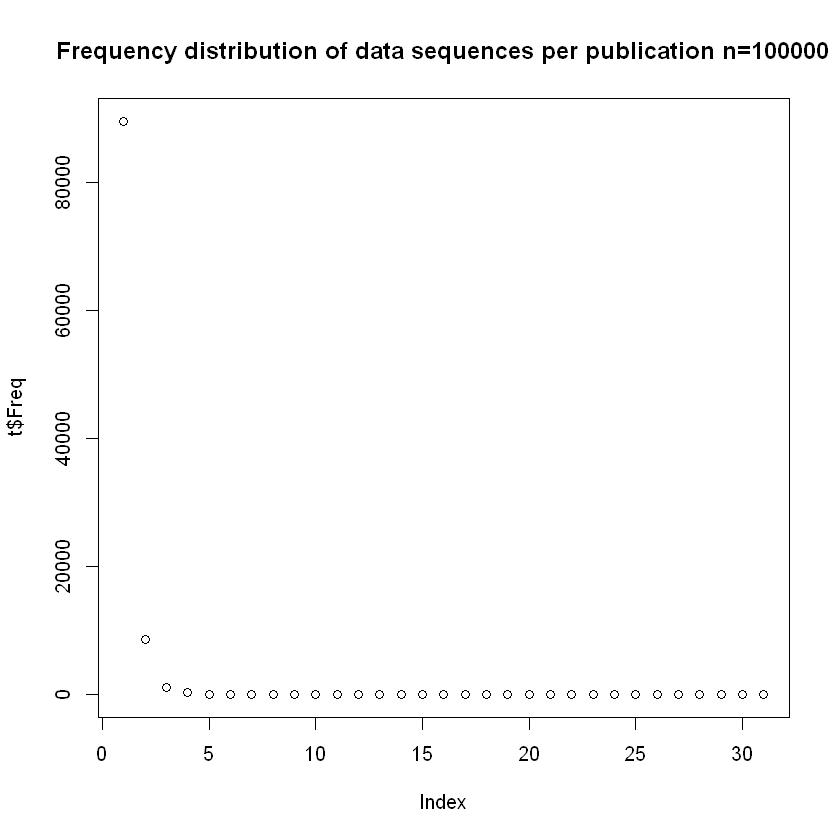

In [12]:
#The interpretation of this summary is that the distribution of sequences per publication and/or revisions to a data submission
#indicated by the group by function, because the implicit assumption (an assumption with high certainty through consulting data document
#tation) is that every duplicate publication title indicates an associated sequence submission because the data is denormalized by 
#base pairs, where a new base pair "(e.g. reference="1 (bases 2:325)" is the first sequence associated with a publication. Likewise,
#A direct submission is not duplicated unless is has been revised; in which case, an amended accession number is associated).
plot(t$Freq, main="Frequency distribution of data sequences per publication n=100000")

In [13]:
# the majority of sequences:
colnames(t)[1]<-"number_of_sequences"
colnames(t)[2]<-"Ref_frequency"
t[1:3,]
# that is, the Ref_Frequency or frequency of references in the data sample that have 1 associated data submission,
#comprise the majority of the entries: n=89627 refererences that have just one data sequences associated with them

#There are 8656 of this sample that have 2 sequences associated with them, etc, to form a scale-free or pareto's law
#distribution shape of the plot. it is much more rare for a publication to be associated with 20 or 30 sequences. One hypothesis for this
#may be that the work required to sequence a data sequence is significantly more difficult and thus rarer. 


number_of_sequences,Ref_frequency
1,89627
2,8656
3,1159


In [30]:
df.auths<-dbGetQuery(con,"SELECT r.id, r.authors, r.title, r.journal, r.year
                    FROM genbank.Reference as r LIMIT 10000;")
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken
df.auths[1:3,]

Time difference of 13.28221 mins

id,authors,title,journal,year
4001,"Wu,Z.A., Liu,W.X., Murphy,C. and Gall,J.",Satellite 1 DNA sequence from genomic DNA of the giant panda Ailuropoda melanoleuca,"Nucleic Acids Res. 18 (4), 1054 (1990)",1990
4002,"Gall,J.",Direct Submission,"Submitted (12-DEC-1989) Gall J., Carnegie Institution, 115 West University Parkway, Baltimore MD 21210, U S A",1989
5001,"Bendixen,E., Halkier,T., Magnusson,S., Sottrup-Jensen,L. and Kristensen,T.",Complete primary structure of bovine beta 2-glycoprotein I: localization of the disulfide bridges,"Biochemistry 31 (14), 3611-3617 (1992)",1992


In [31]:
df.auths<-as.data.frame(df.auths)
class(df.auths)
df.auths$authors<- gsub(" and",",", df.auths$authors)
df.auths$authors <- gsub(" and ",",", df.auths$authors)
df.auths$authors <- gsub("and ",",", df.auths$authors)
#substitute for the three variants in formatting for the author names. 
colnames(df.auths)

[1] "data.frame"

[1] "id"      "authors" "title"   "journal" "year"

In [32]:
df.auths[1:5,]

id,authors,title,journal,year
4001,"Wu,Z.A., Liu,W.X., Murphy,C., Gall,J.",Satellite 1 DNA sequence from genomic DNA of the giant panda Ailuropoda melanoleuca,"Nucleic Acids Res. 18 (4), 1054 (1990)",1990
4002,"Gall,J.",Direct Submission,"Submitted (12-DEC-1989) Gall J., Carnegie Institution, 115 West University Parkway, Baltimore MD 21210, U S A",1989
5001,"Bendixen,E., Halkier,T., Magnusson,S., Sottrup-Jensen,L., Kristensen,T.",Complete primary structure of bovine beta 2-glycoprotein I: localization of the disulfide bridges,"Biochemistry 31 (14), 3611-3617 (1992)",1992
5002,"Kristensen,T.",Direct Submission,"Submitted (11-JUN-1991) T. Kristensen, Dept of Mol Biology, University of Aarhus, C F Mollers Alle 130, DK-8000 Aarhus C, DENMARK",1991
7001,"Kiefer,M.C., Saphire,A.C.S., Bauer,D.M., Barr,P.J.",,Unpublished,NA


In [34]:
df.auths$type<-'publication' 
df.auths[1:2,]

id,authors,title,journal,year,type
4001,"Wu,Z.A., Liu,W.X., Murphy,C., Gall,J.",Satellite 1 DNA sequence from genomic DNA of the giant panda Ailuropoda melanoleuca,"Nucleic Acids Res. 18 (4), 1054 (1990)",1990,publication
4002,"Gall,J.",Direct Submission,"Submitted (12-DEC-1989) Gall J., Carnegie Institution, 115 West University Parkway, Baltimore MD 21210, U S A",1989,publication


In [35]:
df.auths[grep('Submitted',df.auths$journal),]$type<-'submission'
df.auths[grep('Unpublished',df.auths$journal),]$type<-'Unpublished'
df.auths[grep('In press',df.auths$journal),]$type<-'In press'
df.auths[1:3,]

id,authors,title,journal,year,type
4001,"Wu,Z.A., Liu,W.X., Murphy,C., Gall,J.",Satellite 1 DNA sequence from genomic DNA of the giant panda Ailuropoda melanoleuca,"Nucleic Acids Res. 18 (4), 1054 (1990)",1990,publication
4002,"Gall,J.",Direct Submission,"Submitted (12-DEC-1989) Gall J., Carnegie Institution, 115 West University Parkway, Baltimore MD 21210, U S A",1989,submission
5001,"Bendixen,E., Halkier,T., Magnusson,S., Sottrup-Jensen,L., Kristensen,T.",Complete primary structure of bovine beta 2-glycoprotein I: localization of the disulfide bridges,"Biochemistry 31 (14), 3611-3617 (1992)",1992,publication


In [36]:
colnames(df.auths)
df.auths<- cSplit(df.auths, "authors", ".,",'wide')

[1] "id"      "authors" "title"   "journal" "year"    "type"

In [38]:
dim(df.auths)
df.auths<-as.data.frame(df.auths)
df.auths[1:3,]

[1] 10000    28

id,title,journal,year,type,authors_01,authors_02,authors_03,authors_04,authors_05,...,authors_14,authors_15,authors_16,authors_17,authors_18,authors_19,authors_20,authors_21,authors_22,authors_23
4001,Satellite 1 DNA sequence from genomic DNA of the giant panda Ailuropoda melanoleuca,"Nucleic Acids Res. 18 (4), 1054 (1990)",1990,publication,"Wu,Z.A.","Liu,W.X.","Murphy,C.","Gall,J.",NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4002,Direct Submission,"Submitted (12-DEC-1989) Gall J., Carnegie Institution, 115 West University Parkway, Baltimore MD 21210, U S A",1989,submission,"Gall,J.",NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5001,Complete primary structure of bovine beta 2-glycoprotein I: localization of the disulfide bridges,"Biochemistry 31 (14), 3611-3617 (1992)",1992,publication,"Bendixen,E.","Halkier,T.","Magnusson,S.","Sottrup-Jensen,L.","Kristensen,T.",...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [43]:
#There are max 28 authors on a sub or pub in this data sample set. 
#Let's proceed with formatting for an iGraph network analysis.
#Driving research questions are: What are the network properties of submission and publcation networks?
#How dense are the networks (what is the clustering coefficient, the distribution of eigenvector centrality for 
#nodes, the density, connectedness of the graph, i.e. the %size of the giant component?)
N<-df.auths
N[1:2,]
dim(N)

id,title,journal,year,type,authors_01,authors_02,authors_03,authors_04,authors_05,...,authors_14,authors_15,authors_16,authors_17,authors_18,authors_19,authors_20,authors_21,authors_22,authors_23
4001,Satellite 1 DNA sequence from genomic DNA of the giant panda Ailuropoda melanoleuca,"Nucleic Acids Res. 18 (4), 1054 (1990)",1990,publication,"Wu,Z.A.","Liu,W.X.","Murphy,C.","Gall,J.",NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4002,Direct Submission,"Submitted (12-DEC-1989) Gall J., Carnegie Institution, 115 West University Parkway, Baltimore MD 21210, U S A",1989,submission,"Gall,J.",NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 10000    28

In [45]:
N<-N[ ,c(6:28,5,4)]
N[1:3,]

authors_01,authors_02,authors_03,authors_04,authors_05,authors_06,authors_07,authors_08,authors_09,authors_10,...,authors_16,authors_17,authors_18,authors_19,authors_20,authors_21,authors_22,authors_23,type,year
"Wu,Z.A.","Liu,W.X.","Murphy,C.","Gall,J.",NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,publication,1990
"Gall,J.",NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,submission,1989
"Bendixen,E.","Halkier,T.","Magnusson,S.","Sottrup-Jensen,L.","Kristensen,T.",NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,publication,1992


In [47]:
N$iz.na<-is.na(N[,2]) #When I ran it the first time the issue was with solo author.
table(N$iz.na) #There are 4160 solo authors. They may or may not be connected to the giant component. For now, we 
#are excluding them from analysis because data formatting code gives issues. They will likely be engaged in other collaborations, however.

dim(N)
N<-N[N$iz.na=="FALSE",]
dim(N)


FALSE  TRUE 
 5840  4160 

[1] 10000    26

[1] 5840   26

In [49]:
#Store the year and type of reference in these variables before removing these vars for purely author format to play
#nicely with the iGraph analysis.
ref.years<- N$year
ref.type<-N$type
ref.years[1]
ref.type[1]
head(N)

[1] 1990

[1] "publication"

,authors_01,authors_02,authors_03,authors_04,authors_05,authors_06,authors_07,authors_08,authors_09,authors_10,...,authors_17,authors_18,authors_19,authors_20,authors_21,authors_22,authors_23,type,year,iz.na
1,"Wu,Z.A.","Liu,W.X.","Murphy,C.","Gall,J.",NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,publication,1990,FALSE
3,"Bendixen,E.","Halkier,T.","Magnusson,S.","Sottrup-Jensen,L.","Kristensen,T.",NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,publication,1992,FALSE
5,"Kiefer,M.C.","Saphire,A.C.S.","Bauer,D.M.","Barr,P.J.",NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,Unpublished,NA,FALSE
7,"Kobayashi,H.","Stewart,E.","Poon,R.","Adamczewski,J.P.","Gannon,J.","Hunt,T.",NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,publication,1992,FALSE
8,"Brown,N.R.","Noble,M.E.","Endicott,J.A.","Garman,E.F.","Wakatsuki,S.","Mitchell,E.","Rasmussen,B.","Hunt,T.","Johnson,L.N.",NA,...,NA,NA,NA,NA,NA,NA,NA,publication,1995,FALSE
10,"Bauer,J.W.","Fischer-Colbrie,R.",NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,publication,1991,FALSE


In [52]:
N<-N[,c(1:23)] #We want JUST the authors
N[1,]

authors_01,authors_02,authors_03,authors_04,authors_05,authors_06,authors_07,authors_08,authors_09,authors_10,...,authors_14,authors_15,authors_16,authors_17,authors_18,authors_19,authors_20,authors_21,authors_22,authors_23
"Wu,Z.A.","Liu,W.X.","Murphy,C.","Gall,J.",NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [56]:
tmpN <- t(combn(N[1,!is.na(N[1,])], 2)) #all possible combinations of pairs in first row then transposed.
tmpN[1,] #the first pair
df.N <- data.frame(Auth1 = unlist(tmpN[, 1]), Auth2 = unlist(tmpN[, 2]), stringsAsFactors = FALSE) 
df.N #all the author-pairs for the first publication. This is a snippet of code that will be written in a recrusive loop
#function. Kudos to Jeff Hemsley, 2017, for this clever manipulation. 

[[1]]
[1] Wu,Z.A.
5948 Levels: Aalto,M. Aalto,M.K. Aas,S.F. Aaslund,L. Aastroem,S.U. ... Zurita,M.

[[2]]
[1] Liu,W.X.
4552 Levels: Aalen,R. Aarts,H.J. Abarca,D. Abdulaev,N.G. Abe,K. ... Zverlov,V.V.

Auth1,Auth2
"Wu,Z.A.","Liu,W.X."
"Wu,Z.A.","Murphy,C."
"Wu,Z.A.","Gall,J."
"Liu,W.X.","Murphy,C."
"Liu,W.X.","Gall,J."
"Murphy,C.","Gall,J."


In [57]:
#Add the type and year to the author pair to indicate the link "value", that is what kind of collaboration was 
#the production of a reference?
df.N$ref.years <- ref.years[1]
df.N$ref.type <- ref.type[1]
df.N

Auth1,Auth2,ref.years,ref.type
"Wu,Z.A.","Liu,W.X.",1990,publication
"Wu,Z.A.","Murphy,C.",1990,publication
"Wu,Z.A.","Gall,J.",1990,publication
"Liu,W.X.","Murphy,C.",1990,publication
"Liu,W.X.","Gall,J.",1990,publication
"Murphy,C.","Gall,J.",1990,publication


In [58]:
#Loop for all rows to transpose the authors into a format for iGraph analysis. 
start.time <- Sys.time()
for (my.row in 2:dim(N)[1]) {
  # my.row <- 1 + my.row
  print(my.row)
  tmpN <- t(combn(N[my.row,!is.na(N[my.row,])], 2))
  tmp.df <- data.frame(Auth1 = unlist(tmpN[, 1]), Auth2 = unlist(tmpN[, 2]), stringsAsFactors = FALSE)
  
  colnames(tmp.df) <- c("Auth1", "Auth2")
  
  tmp.df$ref.years<- ref.years[my.row]
  tmp.df$ref.type <- ref.type[my.row]    
  
  df.N <- rbind(df.N, tmp.df)
}
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 139
[1

Time difference of 1.766751 mins

In [75]:
#Took about 2 minutes for 5840 author pairs (i.e. number of ties). 
#how many unique authors?
dim(df.N)
colnames(df.N)
df.N.auth1<-df.N[,1]
class(df.N.auth1)
df.N.auth1<-as.data.frame(df.N.auth1)
df.N.auth1[1:3,]
colnames(df.N.auth1)

[1] 42787     4

[1] "Auth1"     "Auth2"     "ref.years" "ref.type"

[1] "factor"

[1] Wu,Z.A. Wu,Z.A. Wu,Z.A.
14197 Levels: Aalto,M. Aalto,M.K. Aas,S.F. Aaslund,L. Aastroem,S.U. ... Tessier,A.

[1] "df.N.auth1"

In [90]:
#unique.auths<-df.N.auth1[!duplicated(df.N.auth1$df.N.auth1) ,]
#unique.auths[1:2,]
#unique.auths2<-data.frame(unique(N$Auth2))
#GRRRR. Not working trying the vis first then coming back to this .
#unique.authors<-cbind()

In [88]:
##Visualization
df2<-df.N
dim(df2)
library(igraph)
g <- graph.data.frame(df2, directed=FALSE)  
#E(g)$weight <- 1
#g <- simplify(g, edge.attr.comb="sum")


[1] 42787     4


   In press publication  submission Unpublished 
        581       40375         223        1608 

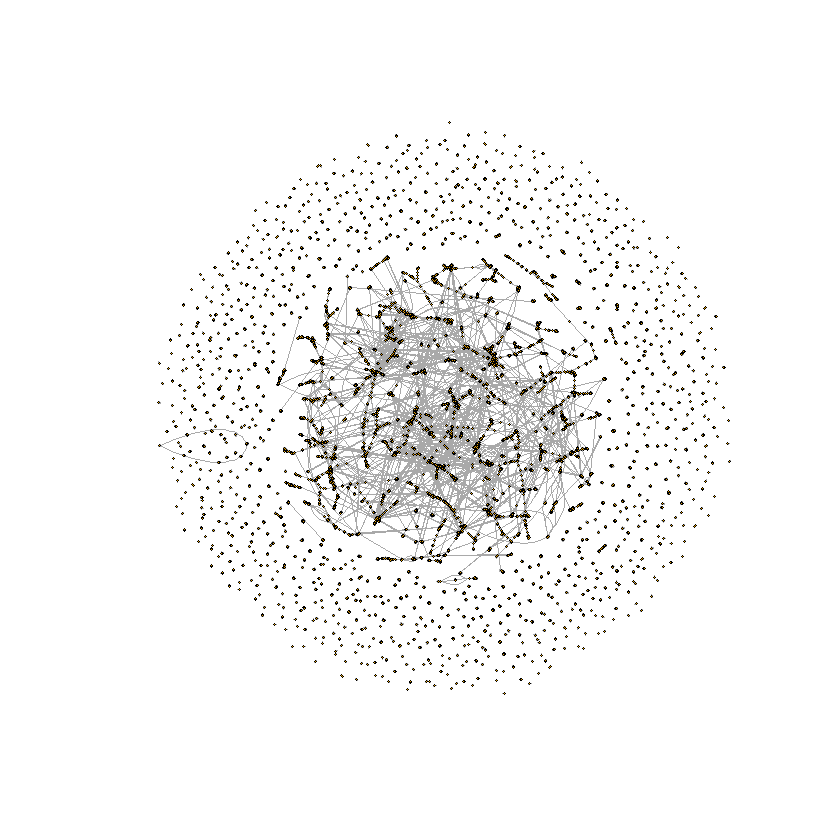

In [89]:

#E(g)$weight <- 1
#g <- simplify(g, edge.attr.comb="sum")


V(g)$size <- 1
#E(g)$width <- E(g)$weight
V(g)$label <- ""

start.time <- Sys.time()
plot.igraph(g, edge.arrow.size=0, edge.arrow.width=0, main="")
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

table(E(g)$ref.type)
E(g)$color <- "red" #this is "In press"
E(g)$color[E(g)$ref.type == "publication"] <- "blue"
E(g)$color[E(g)$ref.type == "submission"] <- "green"




   In press publication  submission Unpublished 
        581       40375         223        1608 

Time difference of 1.123181 mins

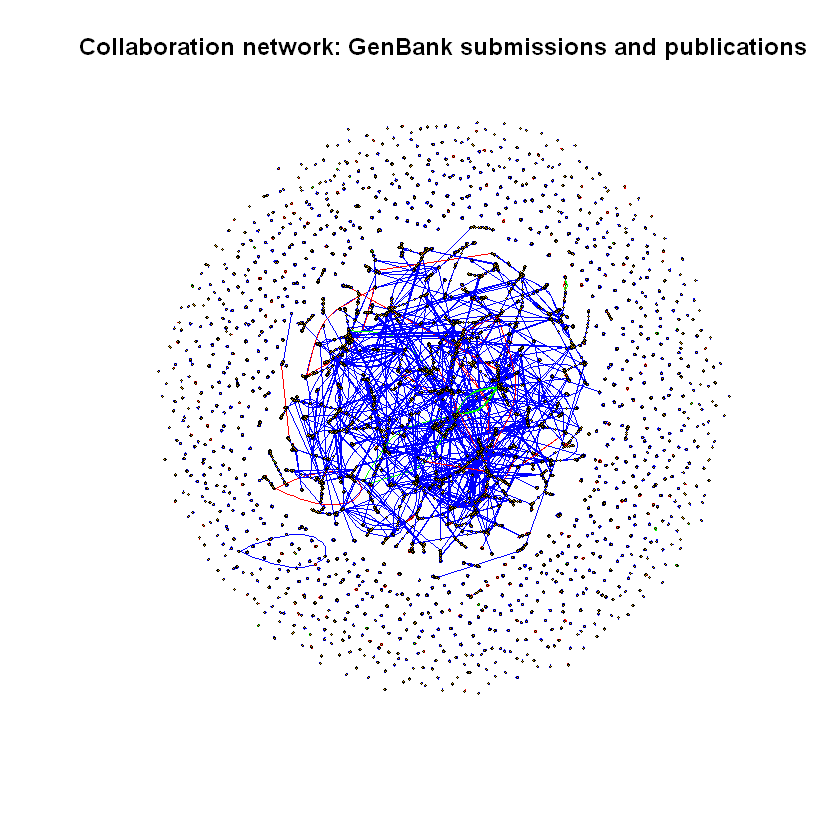

In [91]:
start.time <- Sys.time()
plot.igraph(g, edge.arrow.size=0, edge.arrow.width=0, main="Collaboration network: GenBank submissions and publications")
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

In [ ]:
tab<-(table(E(g)$ref.years))
tab<-as.data.frame(tab)
colnames(tab)[1]<-"year"
attach(tab)
newtab<- tab[order(year),] 
detach(tab)
colnames(tab)
hist(ref.years, main="Publications and Data Submissions per year, n=10,000 references")

In [ ]:
# this next like will take a longer and longer time on biger and bigger networks.
# don't run if you don't have time.
#l <- layout.fruchterman.reingold(g) 
l <- layout.kamada.kawai(g)

V(g)$x <- l[,1]
V(g)$y <- l[,2]


start.time <- Sys.time()
plot.igraph(g, edge.arrow.size=0, edge.arrow.width=0, main="")
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

#V(g)$color <- "brown"
#V(g)$name
#match()

In [ ]:
#example of induced subgraph
g <- make_ring(10)
g2 <- induced_subgraph(g, 1:7)
g3 <- subgraph.edges(g, 1:5, 1:5)

In [ ]:
#component detection
g <- sample_gnp(20, 1/20)
clu <- components(g)
groups(clu)